# Pandas 6

Pandas handles timestamps in a special way that makes it easy to work with time series. As this is particularly important for financial applications, this lecture will concentrate on time series processing.

We will look at:

* the datetime object,
* indexing and slicing by time,
* various operations on time series,
* and, time permitting, we'll build a trading simulator.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For time series analysis, we also need another module
from datetime import datetime

## Loading financial time series data

In [3]:
# Data downloaded from Yahoo! Finance
df = pd.read_csv('Pandas_6_data/aapl.csv') 

# Convert the 'Date' column into a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
df[:5]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,325.64,330.26,324.84,329.57,111284600,44.59
2011-01-04,332.44,332.50,328.15,331.29,77270200,44.82
2011-01-05,329.55,334.34,329.50,334.00,63879900,45.18
2011-01-06,334.72,335.25,332.90,333.73,75107200,45.15
2011-01-07,333.99,336.35,331.90,336.12,77982800,45.47


Pandas also provides convenience functions to get data directly from web sources. For this, we need the _pandas-datareader_ module.

We need to install pandas-datareader.

* Typically, just installing it from the GUI works, but there's currently a bug whose fix is in the "dev" version, but not in the version installed by default.

* Install git  (this is a commonly used version control software). Then try
> pip install git+https://github.com/pydata/pandas-datareader.git

OR, try this:
> git clone https://github.com/pydata/pandas-datareader.git

> cd pandas-datareader

> python setup.py install

In [4]:
# Import the module for web downloads
# (You will need to install the package "pandas-datareader")
import pandas_datareader.data as web

# Specify start and end dates to download
start_date = datetime(2017, 1, 1) # January 1, 2017
end_date = datetime(2019, 1, 1)   # January 1, 2019

# Get Tesla stock for these dates
df = web.DataReader('TSLA', 'stooq', start_date, end_date)
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

df[:5]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,14.3240,14.6887,14.0640,14.4660,82936545
2017-01-04,14.3167,15.2000,14.2873,15.1327,166881135
2017-01-05,15.0947,15.1653,14.7967,15.1167,87832155
2017-01-06,15.1287,15.3540,15.0300,15.2673,81965850
2017-01-09,15.2647,15.4613,15.2000,15.4187,58693575


Note that this DataFrame has a special kind of index.

In [5]:
df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None)

In [6]:
sixth_date = df.index[5]
sixth_date

Timestamp('2017-01-10 00:00:00')

In [7]:
# We can extract year, month, etc.
print(sixth_date, 'corresponds to')
print('year', sixth_date.year)
print('month', sixth_date.month)
print('day', sixth_date.day)
print('day of the week', sixth_date.dayofweek)  # Monday=0, ..., Sunday=6
print('quarter', sixth_date.quarter)

2017-01-10 00:00:00 corresponds to
year 2017
month 1
day 10
day of the week 1
quarter 1


## Indexing in TimeSeries

We can index into this DataFrame using such Timestamp objects.

In [8]:
df.loc[sixth_date]

Open      1.546670e+01
High      1.546670e+01
Low       1.512600e+01
Close     1.532470e+01
Volume    5.394734e+07
Name: 2017-01-10 00:00:00, dtype: float64

In [9]:
df.loc['1/10/2017']  # month/day/year

Open      1.546670e+01
High      1.546670e+01
Low       1.512600e+01
Close     1.532470e+01
Volume    5.394734e+07
Name: 2017-01-10 00:00:00, dtype: float64

In [10]:
df.loc['2017-01-10'] # year-month-day

Open      1.546670e+01
High      1.546670e+01
Low       1.512600e+01
Close     1.532470e+01
Volume    5.394734e+07
Name: 2017-01-10 00:00:00, dtype: float64

In [11]:
df.loc[datetime(year=2017, month=1, day=10)]

Open      1.546670e+01
High      1.546670e+01
Low       1.512600e+01
Close     1.532470e+01
Volume    5.394734e+07
Name: 2017-01-10 00:00:00, dtype: float64

## Slicing in Time Series

We can also use any of the indexing methods above to select out slices of a time series.

In [12]:
df.loc['1/1/2017':'1/10/2017']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,14.3240,14.6887,14.0640,14.4660,82936545
2017-01-04,14.3167,15.2000,14.2873,15.1327,166881135
2017-01-05,15.0947,15.1653,14.7967,15.1167,87832155
2017-01-06,15.1287,15.3540,15.0300,15.2673,81965850
2017-01-09,15.2647,15.4613,15.2000,15.4187,58693575
2017-01-10,15.4667,15.4667,15.1260,15.3247,53947335


In addition, Pandas allows us to easily slice by month or year as well.

In [13]:
closings = df['Close']  # Select one column from our DataFrame; this is a Series
closings['2017-05']

Date
2017-05-01    21.5220
2017-05-02    21.2593
2017-05-03    20.7347
2017-05-04    19.6973
2017-05-05    20.5567
2017-05-08    20.4793
2017-05-09    21.4173
2017-05-10    21.6813
2017-05-11    21.5400
2017-05-12    21.6540
2017-05-15    21.0587
2017-05-16    21.1340
2017-05-17    20.4000
2017-05-18    20.8707
2017-05-19    20.7220
2017-05-22    20.6900
2017-05-23    20.2573
2017-05-24    20.6813
2017-05-25    21.1220
2017-05-26    21.6760
2017-05-30    22.3400
2017-05-31    22.7340
Name: Close, dtype: float64

In [14]:
closings['2017']

Date
2017-01-03    14.4660
2017-01-04    15.1327
2017-01-05    15.1167
2017-01-06    15.2673
2017-01-09    15.4187
               ...   
2017-12-22    21.6800
2017-12-26    21.1527
2017-12-27    20.7760
2017-12-28    21.0240
2017-12-29    20.7567
Name: Close, Length: 251, dtype: float64

The general solution to slicing is to create a range of dates and select a slice using that range. There are many options:

* For calendar dates, use *date_range()*, with a common case being:

   > date_range(start_date, end_date, freq)


* The "freq" can be:
    * 'D' for daily
    * 'B' for each business day
    * 'W-MON', 'W-TUE', ... for once a week on Monday, Tuesday, ...
    * 'M' for monthly
    * ...
    * 'WOM-3FRI' for third Friday of the month (usual for option expiry dates)

In [15]:
dates = pd.date_range(start='1/3/2017', end='2/3/2017', freq='W-TUE')
list(dates)

[Timestamp('2017-01-03 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-10 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-17 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-24 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-31 00:00:00', freq='W-TUE')]

In [16]:
df.loc[dates]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,14.3240,14.6887,14.0640,14.4660,82936545
2017-01-10,15.4667,15.4667,15.1260,15.3247,53947335
2017-01-17,15.7800,15.9973,15.6247,15.7053,68991465
2017-01-24,16.6667,16.9867,16.6433,16.9740,71708985
2017-01-31,16.6160,17.0593,16.5133,16.7953,60792855


## Shifting time series

One special operation with time series is to move backward or forward in time. For instance:

### What is the percentage daily change in closing price?

In [17]:
closes = df['Close']
closes[:10]

Date
2017-01-03    14.4660
2017-01-04    15.1327
2017-01-05    15.1167
2017-01-06    15.2673
2017-01-09    15.4187
2017-01-10    15.3247
2017-01-11    15.3153
2017-01-12    15.3060
2017-01-13    15.8500
2017-01-17    15.7053
Name: Close, dtype: float64

In [18]:
yesterdays_closes = closes.shift(1)
yesterdays_closes[:5]

Date
2017-01-03        NaN
2017-01-04    14.4660
2017-01-05    15.1327
2017-01-06    15.1167
2017-01-09    15.2673
Name: Close, dtype: float64

In [19]:
df['percent change'] = (closes / yesterdays_closes - 1) * 100
df['percent change'][:5]

Date
2017-01-03         NaN
2017-01-04    4.608738
2017-01-05   -0.105731
2017-01-06    0.996249
2017-01-09    0.991662
Name: percent change, dtype: float64

## Aggregate total trading volume by month

This is accomplished using the _resample()_ method. For example:

In [20]:
df['Volume'].resample('M', kind='period').sum()[:10]

Date
2017-01    1469389440
2017-02    1748335800
2017-03    1579495455
2017-04    1733047575
2017-05    2213483220
2017-06    2777207730
2017-07    2717757585
2017-08    2035295985
2017-09    1669630305
2017-10    1842250620
Freq: M, Name: Volume, dtype: int64

Let us understand the details of this function.

    df['volume'].resample('M', kind='period').sum()

* This takes the Volume series, which is indexed on a daily basis,
* _"resamples"_ it on a monthly basis (the 'M'),
*  using the corresponding period as the index, e.g., the month '2017-01',
* and aggregates the volumes on all days in the month using the 'sum' function.

### Find the average closing price every week

In [21]:
df['Close'].resample('W', kind='period').mean()[:10]

Date
2017-01-02/2017-01-08    14.995675
2017-01-09/2017-01-15    15.442940
2017-01-16/2017-01-22    16.040500
2017-01-23/2017-01-29    16.846280
2017-01-30/2017-02-05    16.728780
2017-02-06/2017-02-12    17.543480
2017-02-13/2017-02-19    18.433620
2017-02-20/2017-02-26    17.731500
2017-02-27/2017-03-05    16.643860
2017-03-06/2017-03-12    16.469600
Freq: W-SUN, Name: Close, dtype: float64

## Moving averages

A common statistical technique is to smooth a time series by averaging over a time window. For example, a weekly moving average of a time series has, for each day, the average value of the time series over the previous week.

### Get the 30-day moving average

In [22]:
moving_avg_30 = df['Close'].rolling(window=30, min_periods=10).mean()
moving_avg_30[5:12]

Date
2017-01-10          NaN
2017-01-11          NaN
2017-01-12          NaN
2017-01-13          NaN
2017-01-17    15.290270
2017-01-18    15.344855
2017-01-19    15.420342
Name: Close, dtype: float64

What does this mean?

    df['Close'].rolling(window=30, min_periods=10).mean()

* **df['Close']**: use this time series

* **window=30**: take a window of closes over the past 30 days

* **min_periods=10**: If the past 30 days don't exist (say, today is the 25th day from the start of the time series), what do we do? This option says:
    * for the first 10 days of the time series, the moving average doesn't exist (NaN)
    * from the 10th to 30th day, take the average of as many days as are available (so for the 25th day, we average the past 25 days)
    * from the 30th day onwards, take the average of the past 30 days

* **mean()**: Compute the mean for this rolling window

### Plot the daily closes and the 30-day moving average

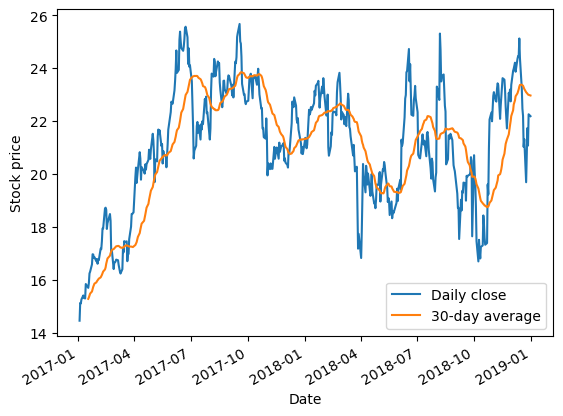

In [23]:
df['Close'].plot(label='Daily close')
df['Close'].rolling(window=30, min_periods=10).mean().plot(label='30-day average')
ylabel('Stock price')
legend(loc='best')
show()

## Trading simulator

* A common trading rule says: 
    * Look at the closing prices
    * Buy when the 30-day moving average goes above the 180-day moving average (the BUY rule)
    * Sell when the opposite happens (the SELL rule).

### Steps ###

* Compute the daily return ratio
    * that is, the ratio of today's closing price to yesterday's closing price.
* Calculate the 30-day and 180-day moving averages
* Create a mask of the days when I hold the share
    * that is, the BUY rule has triggered, but the SELL rule has not.
* Compute the cumulative return ratio over the days of the mask
    * that is, the product of the return ratios on the days I hold the share.

### Step 1: Daily returns

We've already seen this.

In [24]:
closes = df['Close']
daily_return_ratio = closes / closes.shift(1)
daily_return_ratio[:10]

Date
2017-01-03         NaN
2017-01-04    1.046087
2017-01-05    0.998943
2017-01-06    1.009962
2017-01-09    1.009917
2017-01-10    0.993904
2017-01-11    0.999387
2017-01-12    0.999393
2017-01-13    1.035542
2017-01-17    0.990871
Name: Close, dtype: float64

### Step 2: Get the 30-day and 180-day moving averages

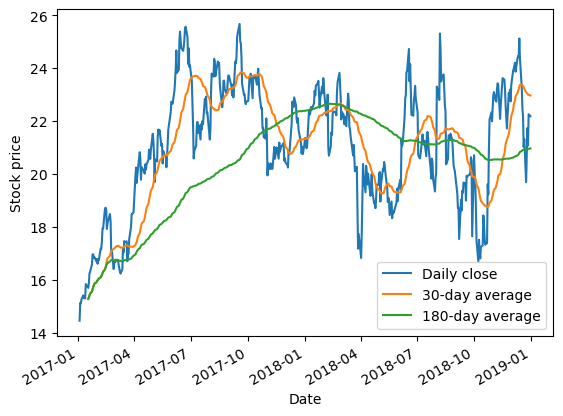

In [25]:
mavg_30 = closes.rolling(window=30, min_periods=10).mean()
mavg_180 = closes.rolling(window=180, min_periods=10).mean()

closes.plot(label='Daily close')
mavg_30.plot(label='30-day average')
mavg_180.plot(label='180-day average')
ylabel('Stock price')
legend(loc='best')
figsize(8,6)

### Step 3: Find the days the 30-day average is greater.

In [26]:
mavg_30_is_greater = (mavg_30 > mavg_180)
mavg_30_is_greater['2017-02-10':'2017-02-21'] 

Date
2017-02-10    False
2017-02-13    False
2017-02-14    False
2017-02-15     True
2017-02-16     True
2017-02-17     True
2017-02-21     True
Name: Close, dtype: bool

* So the BUY rule triggers on `2017-02-15`
* But do I get to hold the stock on all the days where `mavg_30_is_greater` is `True`?

* Let's consider a pair of days where the moving-averages flipped.

In [27]:
mavg_30_is_greater['2017-02-14':'2017-02-15']

Date
2017-02-14    False
2017-02-15     True
Name: Close, dtype: bool

* I didn't hold the stock on `02/14`

* How did I calculate the moving average on `02/15`?
    * This needs the **closing** price on `02/15`, and many previous days
    * So I couldn't have bought the stock until the next day (`02/16`)

#### The same happens when the SELL rule triggers

In [28]:
mavg_30_is_greater['2017-11-16':'2017-11-17']

Date
2017-11-16     True
2017-11-17    False
Name: Close, dtype: bool

* I held the stock on `11/16`
* I waited until the close of `11/17` to calculate moving averages
    * So I held the stock on `11/17` as well.

### Upshot

* We buy the stock the day AFTER the BUY rule triggers
* We sell the stock the day AFTER the SELL rule triggers

So on which days do we hold the stock?

`hold_days = ??`

In [29]:
hold_days = mavg_30_is_greater.shift(1)

The story so far:

* We computed daily returns
* We computed the days on which we hold the share

What's left?

* Compute daily returns just on the days we hold the share
    * and take the product of these daily returns

In [30]:
# One little problem
hold_days[:3]

Date
2017-01-03      NaN
2017-01-04    False
2017-01-05    False
Name: Close, dtype: object

The first date is NaN, because of the shift(). We cannot use hold_days as a mask for daily_return_ratio because the mask must contain only False or True. So let's fix it.

In [31]:
hold_days = hold_days.fillna(False)  # we don't hold shares on the first day
hold_days[:3]

Date
2017-01-03    False
2017-01-04    False
2017-01-05    False
Name: Close, dtype: bool

Let's see the period when we hold the share

[Text(0, 0.0, ''),
 Text(0, 0.5, ''),
 Text(0, 1.0, ''),
 Text(0, 1.5, ''),
 Text(0, 2.0, '')]

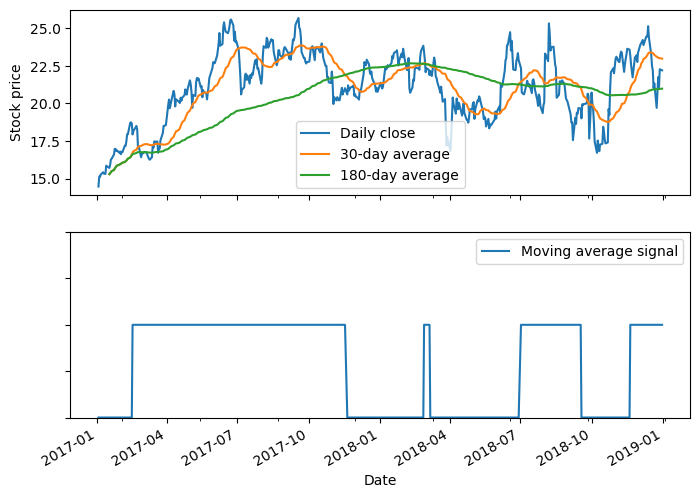

In [32]:
fig, (ax1, ax2) = subplots(nrows=2,
                           ncols=1,
                           sharex=True,
                           figsize=(8, 6))

closes.plot(ax=ax1, label='Daily close')
mavg_30.plot(ax=ax1, label='30-day average')
mavg_180.plot(ax=ax1, label='180-day average')
ax1.legend(loc='best')
ax1.set_ylabel('Stock price')

hold_days.astype(int).plot(ax=ax2, ylim=[0,2], label='Moving average signal')
ax2.legend(loc='best')
ax2.yaxis.set_ticklabels([])

**Finally: Compute cumulative return**

In [33]:
# What are the returns on the days we hold the share?
s = daily_return_ratio[hold_days]
s[:5]

Date
2017-02-16    0.961358
2017-02-17    1.012197
2017-02-21    1.018955
2017-02-22    0.986011
2017-02-23    0.935944
Name: Close, dtype: float64

In [34]:
# Overall return is the product of the returns on each day we held a share.
print('Overall return ratio =', s.prod())

Overall return ratio = 0.8371915216683729


Is this good? Let's compare to a buy-and-hold strategy, where we buy on the first day and sell on the last.

In [35]:
print('Return of buy-and-hold =', daily_return_ratio.prod())

Return of buy-and-hold = 1.5337135351859534


Let's see how the cumulative return of the moving average strategy compares to buy-and-hold.

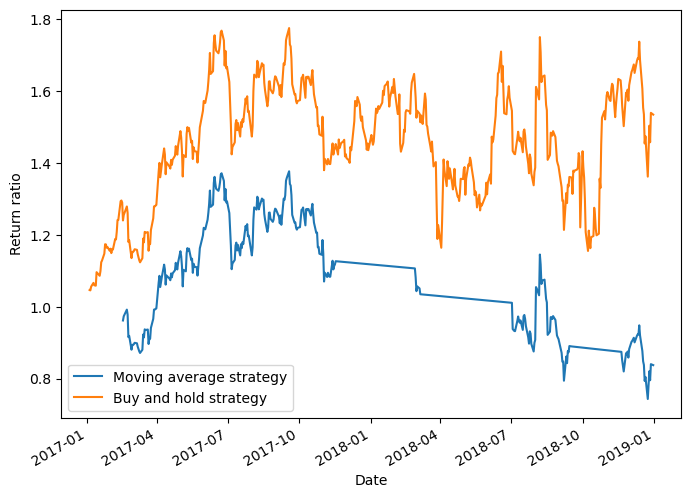

In [36]:
s.cumprod().plot(label='Moving average strategy')
daily_return_ratio.cumprod().plot(label='Buy and hold strategy')
ylabel('Return ratio')
legend(loc='best')
figsize(12,8)

* By the time the moving average strategy sells, the downturn has already hit hard.
* By the time it buys, prices have already gone up quite a bit.